In [4]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [7]:
history=model.fit(train_data,train_target,epochs=100,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 554 samples, validate on 139 samples
Epoch 1/100
554/554 [==============================] - 19s 34ms/step - loss: 0.6932 - acc: 0.5325 - val_loss: 0.6862 - val_acc: 0.5324
Epoch 2/100
554/554 [==============================] - 20s 35ms/step - loss: 0.6726 - acc: 0.5596 - val_loss: 0.6691 - val_acc: 0.5324
Epoch 3/100
554/554 [==============================] - 19s 34ms/step - loss: 0.6523 - acc: 0.5704 - val_loss: 0.6415 - val_acc: 0.5396
Epoch 4/100
554/554 [==============================] - 20s 36ms/step - loss: 0.5953 - acc: 0.5848 - val_loss: 0.6202 - val_acc: 0.5612
Epoch 5/100
554/554 [==============================] - 20s 35ms/step - loss: 0.5633 - acc: 0.6679 - val_loss: 0.5760 - val_acc: 0.6691
Epoch 6/100
554/554 [==============================] - 20s 36ms/step - loss: 0.5024 - acc: 0.7419 - val_loss: 0.5462 - val_acc: 0.7338
Epoch 7/100
554/554 [==============================] - 20s 36ms/step - loss: 0.4720 - acc: 0.761

Epoch 59/100
554/554 [==============================] - 19s 35ms/step - loss: 6.4212e-04 - acc: 1.0000 - val_loss: 1.7615 - val_acc: 0.7050
Epoch 60/100
554/554 [==============================] - 20s 36ms/step - loss: 6.0658e-04 - acc: 1.0000 - val_loss: 1.7781 - val_acc: 0.7122
Epoch 61/100
554/554 [==============================] - 23s 42ms/step - loss: 5.8011e-04 - acc: 1.0000 - val_loss: 1.7810 - val_acc: 0.7122
Epoch 62/100
554/554 [==============================] - 17s 31ms/step - loss: 5.4946e-04 - acc: 1.0000 - val_loss: 1.7931 - val_acc: 0.7050
Epoch 63/100
554/554 [==============================] - 18s 33ms/step - loss: 5.4781e-04 - acc: 1.0000 - val_loss: 1.7944 - val_acc: 0.7122
Epoch 64/100
554/554 [==============================] - 18s 32ms/step - loss: 5.1553e-04 - acc: 1.0000 - val_loss: 1.7928 - val_acc: 0.7122
Epoch 65/100
554/554 [==============================] - 19s 35ms/step - loss: 4.8687e-04 - acc: 1.0000 - val_loss: 1.8172 - val_acc: 0.7122
Epoch 66/100
554/554

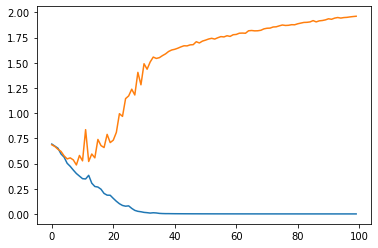

In [8]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

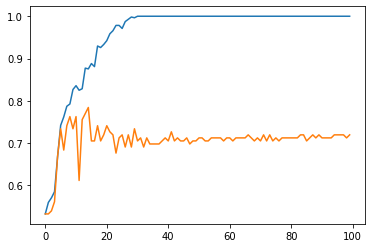

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [10]:
print(model.evaluate(test_data,test_target))

77/77 [==============================] - 1s 7ms/step
[0.992530945059541, 0.8181818205040771]


In [11]:
model.save_weights('CINNOMON LEAF CNN.h5')